### Task 4.4 Supervised Learning - Classification and hyperparameter tuning

- Load dataset
  - Use the COX-2 Activity dataset (see also caret datasets). Try to understand the research question. 
- Split the dataset
  - Use `train_test_split()` to create 75% training and 25% test sets.
- Select a learning method
  - Use `RandomForestRegressor` from `sklearn.ensemble`.
  - Apply preprocessing (scaling/centering) if needed.
- (Optional) Define a tuning grid
  - Use `GridSearchCV` to tune hyperparameters (e.g., `n_estimators`, `max_depth`, `mtry`).
- Perform 10-fold cross-validation
  - Use `cross_val_score` or define `cv=10` inside `GridSearchCV`.
- Analyze performance values
  - Print model performance metrics and feature importances (`model.feature_importances_`).
- Apply the final model to the test set
  - Use `predict()` to make predictions on the test data.
  - Evaluate performance using `accuracy`, `kappa` or similar metrics.
  - IMPORTANT: If preprocessing was applied, apply the same transformation to the test set before prediction.

### Explanation of the dataset
The COX-2 dataset contains molecular descriptors for 462 chemical compounds.

- The target variable is IC50

### Code

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, cohen_kappa_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


We drop the not needed cox2Class column and divide the data into features (X) and target (y).

In [24]:
data = pd.read_csv("./assets/cox2.csv")

data

,QikProp_.stars,QikProp_.amine,QikProp_.acid,QikProp_.rotor,QikProp_.rctvFG,QikProp_CNS,QikProp_MW,QikProp_dipole,QikProp_SASA,QikProp_FOSA,...,moe2D_vsa_acc,moe2D_vsa_don,moe2D_vsa_hyd,moe2D_vsa_other,moe2D_vsa_pol,moe2D_weinerPath,moe2D_weinerPol,moe2D_zagreb,IC50,cox2Class
0,1,0,0,1,0,0,358.882,7.645,635.022,273.363,...,32.02,0.00,268.2,6.513,0.00,1340,37,138,0.001,Inactive
1,0,0,0,2,0,-1,359.870,7.959,622.548,189.930,...,32.02,20.14,236.8,10.110,0.00,1340,37,138,0.001,Inactive
2,0,0,0,3,0,-1,355.451,7.500,610.972,268.526,...,34.52,20.14,238.4,18.560,0.00,1524,39,142,0.001,Inactive
3,1,0,0,2,0,-1,393.423,9.342,651.852,190.772,...,32.02,20.14,249.7,10.110,0.00,1898,43,156,0.001,Inactive
4,1,0,0,2,0,-1,394.315,9.409,637.688,189.933,...,32.02,20.14,255.1,10.110,0.00,1486,40,144,0.001,Inactive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457,2,0,0,1,0,0,461.928,6.419,701.162,83.433,...,37.70,0.00,316.0,21.890,0.00,2373,50,164,100.000,Active
458,1,0,0,1,0,0,316.349,8.097,537.398,83.436,...,32.02,0.00,209.9,13.210,18.84,1099,33,118,100.000,Active
459,2,0,0,1,0,0,384.348,6.748,583.611,84.427,...,32.02,0.00,234.4,19.910,18.84,1626,42,142,100.000,Active
460,0,0,0,3,0,0,356.414,8.417,633.843,200.694,...,41.44,0.00,275.4,13.210,0.00,1529,38,132,100.000,Active


We define the features `X` and the target `y` and divide the dataset into test and train parts.

In [41]:
X = data.drop(columns=['IC50', 'cox2Class'])
y = data['cox2Class']

y = y.map({'Inactive': 0, 'Active': 1})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("train dataset shape:", X_train.shape)
print("test dataset shape:", X_test.shape)

train dataset shape: (346, 255)
test dataset shape: (116, 255)


In [42]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [65]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [66]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=10,
    scoring='r2',
    n_jobs=-1
)

grid_search.fit(X_train_scaled, y_train)
best_rf_model = grid_search.best_estimator_

print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': None, 'max_features': 'log2', 'n_estimators': 200}


In [67]:
y_pred = rf_model.predict(X_test_scaled)

acc = accuracy_score(y_test, y_pred)
kappa = cohen_kappa_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", acc)
print("Kappa:", kappa)
print("\nClassification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.7844827586206896
Kappa: 0.24636174636174624

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.93      0.87        90
           1       0.54      0.27      0.36        26

    accuracy                           0.78       116
   macro avg       0.68      0.60      0.61       116
weighted avg       0.75      0.78      0.76       116

Confusion Matrix:
 [[84  6]
 [19  7]]


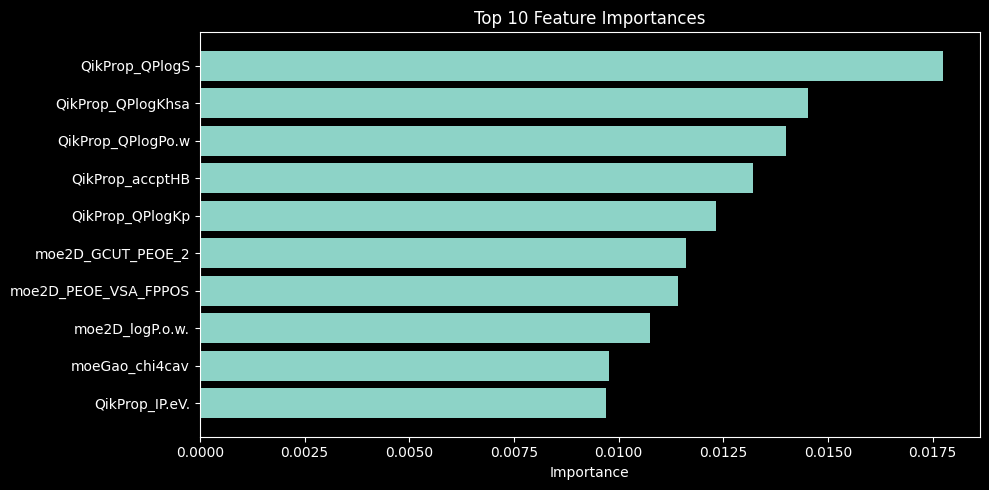

In [68]:
importances = best_rf_model.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[::-1][:10]

plt.figure(figsize=(10, 5))
plt.barh(np.array(feature_names)[indices][::-1], importances[indices][::-1])
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()